In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [2]:
df = pd.read_csv("data/student_behavior_intelligence_dataset.csv")

df.head()


,date,study_hours,sleep_hours,screen_time,mood,exercise_minutes,caffeine_cups,expenses,productivity_score
0,2022-01-01,7.894085,7.679227,2.987233,4,17.047596,1,317.139737,6.505744
1,2022-01-02,6.751124,7.109560,3.783222,5,29.531948,4,367.879633,6.228383
2,2022-01-03,8.165839,6.071556,2.811370,6,30.270253,5,504.346266,6.855625
3,2022-01-04,9.741454,5.223676,3.538058,9,37.089455,4,149.377415,7.584691
4,2022-01-05,6.578524,6.837868,1.159578,7,9.497125,3,263.062741,5.583563


In [3]:
X = df.drop(columns=["date", "productivity_score"])
y = df["productivity_score"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
model = LinearRegression()

model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [6]:
predictions = model.predict(X_test)


In [7]:
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 0.12874885682841125
R2 Score: 0.8650240236946871


In [8]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_
})

coefficients.sort_values(by="Importance", ascending=False)


,Feature,Importance
0,study_hours,0.468754
1,sleep_hours,0.234773
4,exercise_minutes,0.049092
6,expenses,-0.000077
5,caffeine_cups,-0.002192
3,mood,-0.033524
2,screen_time,-0.201951


In [9]:
# Example new student lifestyle
new_data = pd.DataFrame({
    "study_hours": [6],
    "sleep_hours": [7],
    "screen_time": [3],
    "mood": [8],
    "exercise_minutes": [40],
    "caffeine_cups": [2],
    "expenses": [200]
})

prediction = model.predict(new_data)

print("Predicted Productivity Score:", prediction[0])


Predicted Productivity Score: 6.4403138225980525


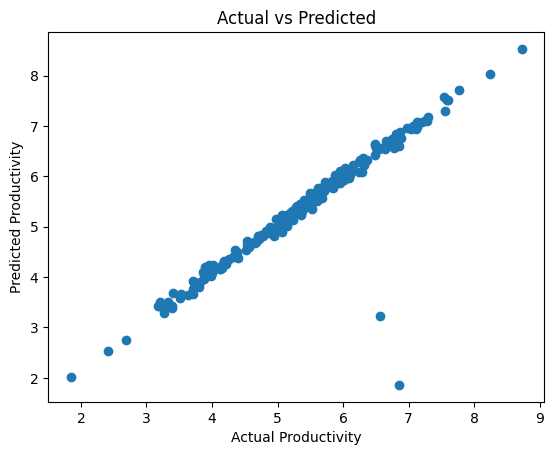

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted")
plt.show()


In [11]:
import joblib

joblib.dump(model, "productivity_model.pkl")


['productivity_model.pkl']

In [12]:
import joblib

loaded_model = joblib.load("productivity_model.pkl")

print("Model loaded successfully!")


Model loaded successfully!


In [13]:
def predict_productivity(study, sleep, screen, mood, exercise, caffeine, expenses):
    
    data = pd.DataFrame({
        "study_hours": [study],
        "sleep_hours": [sleep],
        "screen_time": [screen],
        "mood": [mood],
        "exercise_minutes": [exercise],
        "caffeine_cups": [caffeine],
        "expenses": [expenses]
    })
    
    prediction = loaded_model.predict(data)[0]
    
    return round(prediction, 2)


In [14]:
def productivity_advisor(study, sleep, screen, mood, exercise, caffeine, expenses):
    
    score = predict_productivity(study, sleep, screen, mood, exercise, caffeine, expenses)
    
    advice = []
    
    if study < 4:
        advice.append("Increase study hours.")
        
    if sleep < 6:
        advice.append("Improve sleep schedule.")
        
    if screen > 5:
        advice.append("Reduce screen time.")
        
    if exercise < 20:
        advice.append("Try adding some physical activity.")
        
    if mood < 5:
        advice.append("Focus on mental wellness.")
    
    return score, advice
